In [29]:
import json
import re

In [30]:
with open("../data/data_thaimos_pairwise_diffall.json") as f:
    raw_data = json.load(f)

In [31]:
raw_data[0]

[{'system': 'macOS',
  'datawow_id': 1481,
  'path': '/data/share/data/Speech/dataWow/audios/macOS/sentence_31.wav',
  'text': 'ย้อนกลับไปดูเค้าโครงและรายการเอกสารประกอบการสอน สมัยยังมีแรง ตอนนี้ไม่มีแล้ว หมด โฮ',
  'sound': 3.875,
  'rhythm': 2.9375,
  'pronunciation': 2.25},
 {'system': 'gTTS',
  'datawow_id': 1431,
  'path': '/data/share/data/Speech/dataWow/audios/gTTS/sentence_31.wav',
  'text': 'ย้อนกลับไปดูเค้าโครงและรายการเอกสารประกอบการสอน สมัยยังมีแรง ตอนนี้ไม่มีแล้ว หมด โฮ',
  'sound': 4.3125,
  'rhythm': 2.9375,
  'pronunciation': 4.125}]

In [32]:
with open("./thaimos_test.json") as f:
    thaimos = json.load(f)

In [33]:
thaimos[0]

{'audio_a': 'sentence_31.wav',
 'audio_b': 'sentence_31.wav',
 'mos_pronunciation_a': 2.25,
 'mos_pronunciation_b': 4.125,
 'text': 'ย้อนกลับไปดูเค้าโครงและรายการเอกสารประกอบการสอน สมัยยังมีแรง ตอนนี้ไม่มีแล้ว หมด โฮ',
 'response': 'The second speech sample has better quality.'}

In [21]:
thaimos[5]

{'audio_a': 'sentence_3.wav',
 'audio_b': 'sentence_3.wav',
 'mos_pronunciation_a': 3.875,
 'mos_pronunciation_b': 4.625,
 'text': 'มันดูเหมือนว่า การยืนยันของจดหมายนี้ทำให้เขาผิดหวัง',
 'response': 'The second speech sample has better quality.'}

In [34]:
label_mapping = {
    "The first.": "A",
    "The second.": "B",
    "The second is better.": "B",
    "The latter is better.": "B",
    "The latter.": "B",
}

In [36]:
# def read_output_file(path):
path = "./thaimos_test.processed.jsonl"
outputs = []
with open(path, "r") as f:
    for line in f:
        x = json.loads(line)
        outputs.append(x)

path = "./eval_test_epoch_best_thaimos.json"
with open(path) as f:
    outputsGOOD = json.load(f)

count_all, count_correct, count_incorrect, count_tie, error = 0, 0, 0, 0, 0
predictions = []
for output, output_good in zip(outputs, outputsGOOD):    
    
    verdict_text = label_mapping[output_good['text'][0].strip("</s>")]
    assert verdict_text in ['A', 'B', 'C', 'D']
    
    if verdict_text == "A":
        if output['mos_pronunciation_a'] > output['mos_pronunciation_b']:
            count_correct += 1
            evaluation = "correct"
        else:
            count_incorrect += 1
            evaluation = "incorrect"
    elif verdict_text == "B":
        if output['mos_pronunciation_a'] < output['mos_pronunciation_b']:
            count_correct += 1
            evaluation = "correct"
        else:
            count_incorrect += 1
            evaluation = "incorrect"
    elif verdict_text == "C":
        evaluation = 'tie'
        count_tie += 1
    else:
        evaluation = 'error'
        error += 1
    count_all += 1
    predictions.append([evaluation, verdict_text, output['mos_pronunciation_a'], output['mos_pronunciation_b']])
print("total:", count_all)
print("accuracy: {:.2f}%".format(count_correct/count_all*100))
print("inaccura: {:.2f}%".format(count_incorrect/count_all*100))
print("tie:      {:.2f}%".format(count_tie/count_all*100))
print("error:    {:.2f}%".format(error/count_all*100))
    # return predictions

total: 3300
accuracy: 54.64%
inaccura: 45.36%
tie:      0.00%
error:    0.00%


In [37]:
44.91 + 44.45 + 1.00 + 9.64

100.0

# System-level Correlation

In [15]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [16]:
def analyze_correlation_and_plot(list_a, list_b):
    # 1. Compute Pearson correlation
    pearson_corr, _ = stats.pearsonr(list_a, list_b)

    # 2. Compute Spearman correlation
    spearman_corr, _ = stats.spearmanr(list_a, list_b)

    # Print results
    print(f"Pearson Correlation: {pearson_corr:.3f}")
    print(f"Spearman Correlation: {spearman_corr:.3f}")

    # 4. Scatter plot with best-fit line
    plt.figure(figsize=(5, 4))
    plt.scatter(list_a, list_b, color='blue', label='Data points')

    # Best fit line
    coefficients = np.polyfit(list_a, list_b, 1)  # Linear fit (degree=1)
    poly = np.poly1d(coefficients)
    best_fit_line = poly(list_a)

    plt.plot(list_a, best_fit_line, color='red', label='Best Fit Line')
    plt.xlabel('MOS (GT)')
    plt.ylabel('AudioJudge Prediction (Win Rate)')
    plt.title('Scatter Plot with Best Fit Line')
    plt.legend()
    plt.grid()
    plt.show()

In [24]:
raw_data[0]

[{'system': 'macOS',
  'datawow_id': 1481,
  'path': '/data/share/data/Speech/dataWow/audios/macOS/sentence_31.wav',
  'text': 'ย้อนกลับไปดูเค้าโครงและรายการเอกสารประกอบการสอน สมัยยังมีแรง ตอนนี้ไม่มีแล้ว หมด โฮ',
  'sound': 3.875,
  'rhythm': 2.9375,
  'pronunciation': 2.25},
 {'system': 'gTTS',
  'datawow_id': 1431,
  'path': '/data/share/data/Speech/dataWow/audios/gTTS/sentence_31.wav',
  'text': 'ย้อนกลับไปดูเค้าโครงและรายการเอกสารประกอบการสอน สมัยยังมีแรง ตอนนี้ไม่มีแล้ว หมด โฮ',
  'sound': 4.3125,
  'rhythm': 2.9375,
  'pronunciation': 4.125}]

In [25]:
outputs[0]

{'audio_a': 'sentence_31.wav',
 'audio_b': 'sentence_31.wav',
 'mos_pronunciation_a': 2.25,
 'mos_pronunciation_b': 4.125,
 'text': 'ย้อนกลับไปดูเค้าโครงและรายการเอกสารประกอบการสอน สมัยยังมีแรง ตอนนี้ไม่มีแล้ว หมด โฮ',
 'response': 'The second speech sample has better quality.',
 'processed': 'B'}

Pearson Correlation: 0.449
Spearman Correlation: 0.189


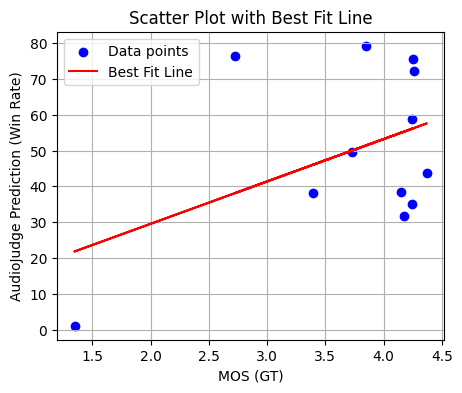

In [39]:
pred_by_system, gts_by_system = {}, {}

path = "./thaimos_test.processed.jsonl"
outputs = []
with open(path, "r") as f:
    for line in f:
        x = json.loads(line)
        outputs.append(x)

with open("../data/data_thaimos_pairwise_diffall.json") as f:
    raw_data = json.load(f)

path = "./eval_test_epoch_best_thaimos.json"
with open(path) as f:
    outputsGOOD = json.load(f)

i = 0
for output, output_good in zip(outputs, outputsGOOD):
    if raw_data[i][0]['pronunciation'] == output['mos_pronunciation_a'] and raw_data[i][1]['pronunciation'] == output['mos_pronunciation_b']:
        order = 'ab'
    elif raw_data[i][1]['pronunciation'] == output['mos_pronunciation_a'] and raw_data[i][0]['pronunciation'] == output['mos_pronunciation_b']:
        order = 'ba'
    else:
        raise Exception()

    if order == 'ab':
        model_a = raw_data[i][0]['system']
        model_b = raw_data[i][1]['system']
    else:
        model_a = raw_data[i][1]['system']
        model_b = raw_data[i][0]['system']
        
    if model_a not in pred_by_system: pred_by_system[model_a] = []
    if model_a not in gts_by_system:  gts_by_system[model_a] = []
    if model_b not in pred_by_system: pred_by_system[model_b] = []
    if model_b not in gts_by_system:  gts_by_system[model_b] = []
        
    verdict_text = label_mapping[output_good['text'][0].strip("</s>")]
    assert verdict_text in ['A', 'B', 'C', 'D']
        
    if verdict_text == "A":
        pred_by_system[model_a] += [1]
        pred_by_system[model_b] += [0]
    elif verdict_text == "B":
        pred_by_system[model_a] += [0]
        pred_by_system[model_b] += [1]
    elif verdict_text == "C" or verdict_text == "D":
        pred_by_system[model_a] += [0.5]
        pred_by_system[model_b] += [0.5]    
    else:
        raise Exception()

    gts_by_system[model_a] += [output['mos_pronunciation_a']]
    gts_by_system[model_b] += [output['mos_pronunciation_b']]
    i += 1
    
system_level_pred, system_level_gts = [], []
systems = []
for system, pred in pred_by_system.items():
    gts = gts_by_system[system]
    assert len(pred) == len(gts)
    system_level_pred.append(np.mean(pred)*100)
    system_level_gts.append(np.mean(gts))
    systems.append(system)
analyze_correlation_and_plot(system_level_gts, system_level_pred)